# General Algorithm For Course (version 0.1)
1. Remove essential nodes and clean up network
2. Perform Markov Cluster Algorithm (MCL) setting numnodes in the nieghbourhood of 200/300. 
3. Create new network, where each node represents the clusters:
  - Weighted network option with weights set to number of connections between cluster a and cluster b
  - Unweighted set by direct connection.
4. Perform centrality analysis on the cluster network and identify important clusters.
5. Find shortest path nodes for important clusters as proteins of inteerest.

In [ ]:
import networkx as nx
import markov_clustering as mc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
df = pd.read_csv("4932.protein.links.v11.5.txt.gz", sep=" ")
nodes = set(df["protein1"])

df = df[df.combined_score >= 700]
G = nx.from_pandas_edgelist(df, "protein1", "protein2")

new = nodes - set(G.nodes)
for node in new:
    G.add_node(node)
    
essential = pd.read_csv("essential_proteins.csv", header = None, usecols = [1])
essential = essential[1].tolist()

for protein in essential:
    name = "4932." + protein
    if name in G.nodes():
        G.remove_node(name)
        

FileNotFoundError: ignored

In [ ]:
#Finds clusters
adj_matrix = nx.adjacency_matrix(G0) # Here we are going to lose the protein names as the matrix gets assigned to their index. So we recover that with a hash table
# Create a hash table that takes takes a number and returns a protein name
protein_hash = {}
for index, node in enumerate(G0.nodes):
    protein_hash[index] = node

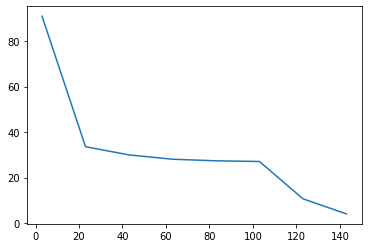

In [ ]:
# CAUTION TAKES A LONG TIME TO RUN
def getmeans(expansion,inflation):
    ''' This function takes the imputs of expansion and inflation for the MCL algorithm. Then it returns the mean size of the length of each cluster after the algorithm'''
    result = mc.run_mcl(adj_matrix,expansion=expansion,inflation=inflation)
    clusters = mc.get_clusters(result) 
    clusterlengths = [len(cluster) for cluster in clusters]
    return sum(clusterlengths)/len(clusterlengths)

# Range of test inflation values for fixed expansion = 5
inflations = range(3,163,20)
means = [getmeans(3,inflation) for inflation in inflations]

plt.plot(inflations,means)
plt.xlabel("Inflation Value");
plt.ylabel("Mean Cluster Size")


In [ ]:
print(getmeans(3,120))

18.791666666666668


In [ ]:
EXPANSION = 3
INFLATION = 120
result = mc.run_mcl(adj_matrix,expansion=EXPANSION,inflation=INFLATION)
clusters = mc.get_clusters(result) 

In [ ]:
print(f"The number of clusters: {len(clusters)}")
print(f"Number of proteins: {sum(len(cluster) for cluster in clusters)}")
print(f"Average size of cluster: {round(sum(len(cluster) for cluster in clusters)/len(clusters),3)} nodes")

In [ ]:
named_clusters = []
lpd1pos = 0
for index,cluster in enumerate(clusters):
    named_cluster = tuple([protein_hash[node] for node in cluster])
    if "4932.YFL018C" in named_cluster:
        lpd1pos = index
    named_clusters.append(named_cluster)

NameError: ignored

In [ ]:
clusterNetwork = nx.Graph()

for index in range(len(named_clusters)):
    if index != lpd1pos:
        clusterNetwork.add_node(f"cluster{index}")
    elif index == lpd1pos:
        clusterNetwork.add_node(f"  ")

In [ ]:
# (2,3,{‘weight’:3.1415})

nodeslist = list(clusterNetwork.nodes)
for xindex,xnode in enumerate(nodeslist):
    for yindex in range(xindex+1,len(nodeslist)):
        ynode = list(nodeslist)[yindex]
        
        xnodeproteins = named_clusters[xindex]
        ynodeproteins = named_clusters[yindex]

        weight = 0
        for xprotein in xnodeproteins:
            for yprotein in ynodeproteins:
                
                if G0.get_edge_data(xprotein,yprotein):
                    weight += 1
                    

        clusterNetwork.add_edges_from([(xnode,ynode,{'weight':weight})])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(30,30))
nx.draw_networkx(clusterNetwork,nx.spring_layout(clusterNetwork,k=1),node_size=300,alpha = 0.9, node_color = '#3399ff',with_labels=False)
plt.show()

In [ ]:
proteins = pd.read_csv("4932.protein.info.v11.5.txt", sep = "\t")
names = ['LPD1', 'PDA1', 'PYC2', 'PDB1', 'PTC1', 'BAT2', 'KGD1', 'AIM22', 'PKP1', 'PTC5', 'LAT1']
nodes = [] 
for name in names:
    nodes.append((proteins.loc[proteins['preferred_name'] == name])['#string_protein_id'].iloc[0])
print(nodes)

IndentationError: ignored